# Clasificacion de imagenes de señales de trafico

# Importar librerias y datasets

Lo primero que se debe de hacer es importar las librerias y cargar el dataset seleccionado para asi realizar el proceso de clasificacion.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

Se realiza lo que es la separacion de los archivos train y test para luego con ello trabajarlos

In [4]:
x_train , y_train = train["features"] , train["labels"]

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
x_valid , y_valid = valid["features"] , valid["labels"]

In [8]:
x_valid.shape

(4410, 32, 32, 3)

In [9]:
x_test , y_test = test["features"] , test["labels"]

In [10]:
x_test.shape

(12630, 32, 32, 3)

# VISUALIZACIÓN DE IMÁGENES

2

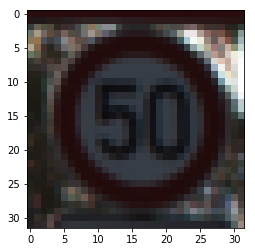

In [11]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

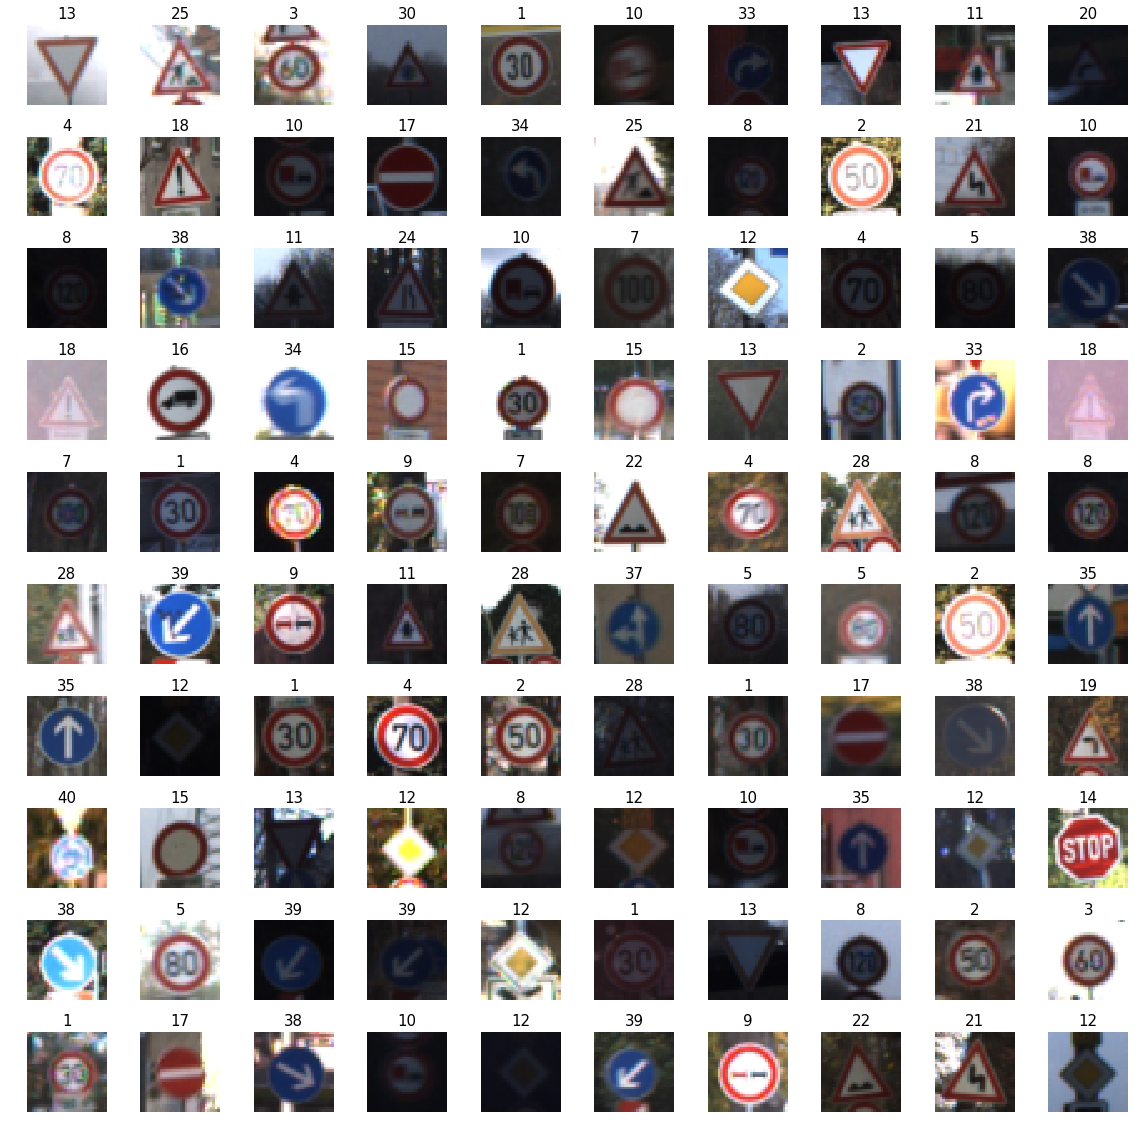

In [13]:
# Veamos más imágenes en formato de cuadrícula
# Definir las dimensiones de la cuadrícula de trazado
W_grid = 10
L_grid = 10

# subplot devuelve el objeto figura y el objeto ejes
# podemos usar el objeto ejes para trazar figuras específicas en varias ubicaciones

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0 , W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0 , n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index] , fontsize = 15)
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

        

# CONVERTIR IMÁGENES A ESCALA DE GRISES Y REALIZAR NORMALIZACIÓN

In [14]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [15]:
x_train_gray = np.sum(x_train / 3 , axis = 3 , keepdims = True)

In [16]:
x_train_gray_norm = (x_train_gray - 128) / 128

In [17]:
x_train_gray_norm

array([[[[-0.78125   ],
         [-0.79166667],
         [-0.79166667],
         ...,
         [-0.77864583],
         [-0.8046875 ],
         [-0.81510417]],

        [[-0.78125   ],
         [-0.796875  ],
         [-0.79947917],
         ...,
         [-0.84114583],
         [-0.8046875 ],
         [-0.7734375 ]],

        [[-0.80208333],
         [-0.80208333],
         [-0.80989583],
         ...,
         [-0.84635417],
         [-0.796875  ],
         [-0.77083333]],

        ...,

        [[-0.78385417],
         [-0.74739583],
         [-0.7109375 ],
         ...,
         [-0.68229167],
         [-0.7578125 ],
         [-0.79947917]],

        [[-0.77864583],
         [-0.7734375 ],
         [-0.76041667],
         ...,
         [-0.66666667],
         [-0.7421875 ],
         [-0.78645833]],

        [[-0.74479167],
         [-0.75      ],
         [-0.77604167],
         ...,
         [-0.65885417],
         [-0.7265625 ],
         [-0.77604167]]],


       [[[-0.45052083],


In [18]:
x_test_gray = np.sum(x_test / 3 , axis = 3 , keepdims = True)
x_valid_gray = np.sum(x_valid / 3 , axis = 3 , keepdims = True)

In [19]:
x_test_gray_norm = (x_test_gray - 128) / 128
x_valid_gray_norm = (x_valid_gray - 128) / 128

In [20]:
x_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


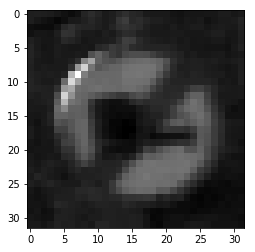

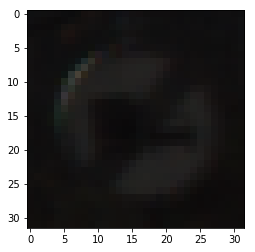

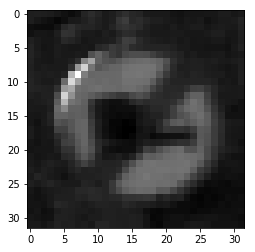

In [21]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

# CONSTRUIR MODELO DE RED NEURAL CONVOLUCIONAL PROFUNDA

In [22]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6 , (5 , 5) , activation = "linear" , input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16 , (5 , 5) , activation = "linear"))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())

CNN.add(layers.Dense(120 , activation = "linear"))
CNN.add(layers.Dense(84 , activation = "linear"))
CNN.add(layers.Dense(43 , activation = "softmax"))
CNN.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
____

# COMPILAR Y ENTRENAR MODELO CNN


In [23]:
CNN.compile(optimizer = "RMSprop" , loss = "sparse_categorical_crossentropy" , metrics = ["sparse_categorical_accuracy"])


In [54]:
history = CNN.fit(x_train_gray_norm,
                  y_train,batch_size = 500,
                 epochs = 10,
                 verbose = 1,
                 validation_data = (x_valid_gray_norm , y_valid))


Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 11s 307us/sample - loss: 0.3392 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.8318 - val_sparse_categorical_accuracy: 0.8431
Epoch 2/10
34799/34799 [==============================] - 11s 329us/sample - loss: 0.3446 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.8640 - val_sparse_categorical_accuracy: 0.8478
Epoch 3/10
34799/34799 [==============================] - 11s 319us/sample - loss: 0.3388 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.8018 - val_sparse_categorical_accuracy: 0.8580
Epoch 4/10
34799/34799 [==============================] - 12s 342us/sample - loss: 0.3390 - sparse_categorical_accuracy: 0.9270 - val_loss: 0.8166 - val_sparse_categorical_accuracy: 0.8565
Epoch 5/10
34799/34799 [==============================] - 12s 339us/sample - loss: 0.3342 - sparse_categorical_accuracy: 0.9269 - val_loss: 0.7864 - val_sparse_categorical_accuracy: 0.8612
Epoch 

# EVALUACIÓN DEL MODELO ENTRENADO EN CNN

Calculo del accuracy

In [52]:
#y_pred = CNN.predict(x_test_gray_norm)

In [53]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 151us/sample - loss: 1.2061 - sparse_categorical_accuracy: 0.8394
Test Accuracy: 0.8393507599830627


In [26]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [27]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

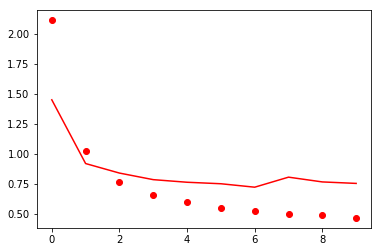

In [28]:
epochs = range(len(acc))
plt.plot(epochs , loss , "ro" , label = "Training Loss")
plt.plot(epochs , val_loss , "r" , label = "Validation Loss")
#plt.title("Training and Validation Loss")

Grafica del entrenamiento y validacion del accuracy

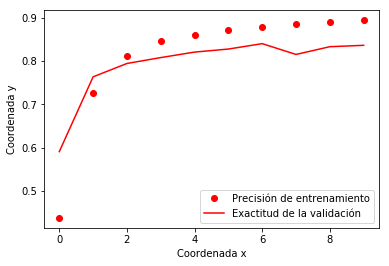

In [45]:
epochs = range(len(acc))
plt.ion()
#label="Training accuracy"
#label="Validation accuracy"
plt.xlabel('Coordenada x')
plt.plot(epochs , acc , "ro" )
plt.ylabel('Coordenada y')
plt.plot(epochs , val_acc , "r")
plt.legend(['Precisión de entrenamiento','Exactitud de la validación'])
#plt.title("Training and Validation accuracy")

# Predicciones CNN

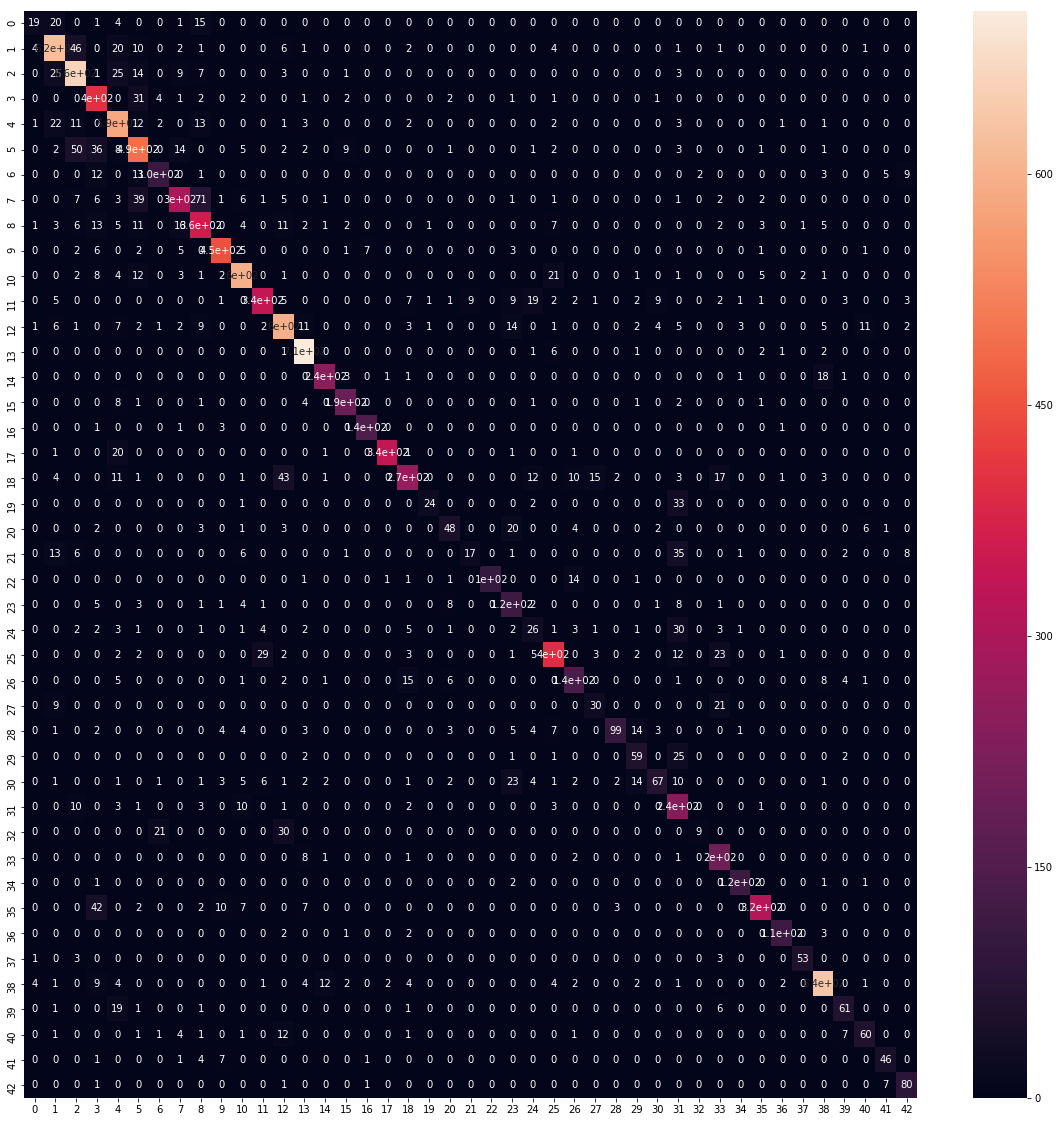

In [37]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

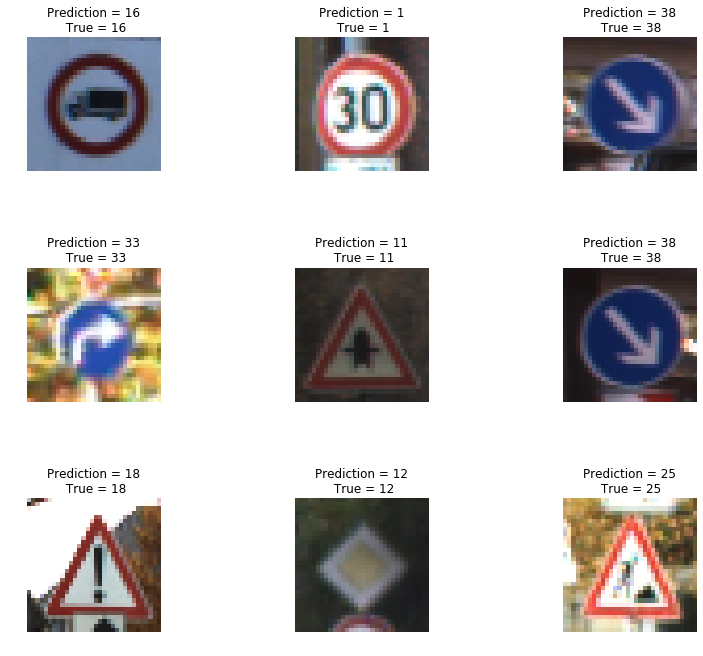

In [40]:
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# Conclusiones

Nuestra tecnica supera al estado de arte ya que hemos logrado una mejor calidad de predicciones y en el mejor tiempo de ejecución,tambien hemos utilizado diferentes parametros en el proceso de optimización de la red neuronal y por ello logramos obtener esos resultados, hemos trabajado con detección de señales y estos resultados nos pueden servir para evitar en muchos casos como son accidentes de transito, y sobre todo prevenciones generales. 

Para el futuro se puede extender esta metodología a todas las señales de tránsito del tipo prohibición del Mundo, donde se trate de abarcar todo el resto de las señales, para área urbanas, rurales y autopistas con el fin de brindar soluciones integrales a problemas que hoy en día se generan con mayor frecuencia, para que a futuro se lo realice de manera predictoria y en la mayor parte posible de manera eficaz es decir una predicción realmente efectiva.